In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

The idea is to mnimize:
$$ y = x^2 -2x - 1 $$
using sdg:
$$ x_i+1 = x_i + \alpha f'(x_i) $$

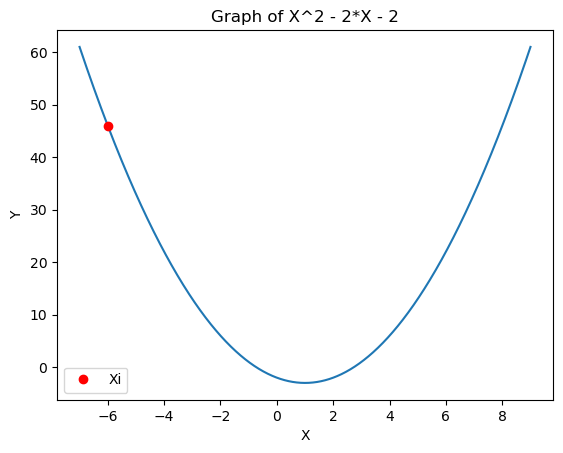

In [6]:
def f(x):
    return x**2 - 2*x - 2

next_x = [-6]

X = np.linspace(-7, 9, 1000)
Y = X**2 - 2*X - 2
plt.plot(X, Y)
plt.title("Graph of X^2 - 2*X - 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(next_x, [f(i) for i in next_x],'ro', label='Xi')
plt.legend()


In [7]:
next_x = [-6]

X = np.linspace(-7, 9, 1000)

epsilon = 0.3
lr = 0.01

x = tf.Variable(-6, dtype=tf.float64)
step = 0
# f(x).numpy() <= -2 - epsilon or f(x).numpy() >= -2 + epsilon
while step <= 200:
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = f(x)

    dy_dx = tape.gradient(y, x)
    x = x + lr * dy_dx
    next_x.append(x.numpy())
    step += 1


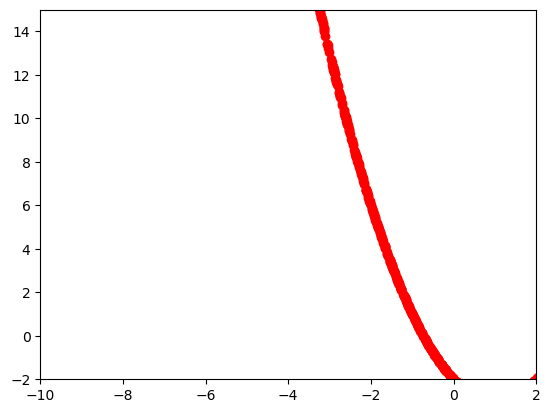

In [8]:


fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(-10, 2)
    ax.set_ylim(-2, 15)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(f(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(next_x, [f(i) for i in next_x], step),
                    init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())
